In [1]:
import numpy as np
import matplotlib.pyplot as plt

No 1 Linear Equation

In [9]:
x = [
    [
        [8, 4, 2],
        [1, 6, 3],
        [5, 6, 12]
    ],
    [
        [12, -7, -1],
        [1, -7, 2],
        [8, -1, 12]
    ],
    [
        [4, 2, 7],
        [3, -7, 5],
        [2, -1, 3]
    ],
    [   
        [14, 2, 1],
        [1, 8, 4],
        [9, 8, 18]
    ],
    [   
        [1, 3, 6],
        [9, 1, 12],
        [15, 18, 1]
    ]
]
y = [
    [10, 12, 15],
    [21, 12, 4],
    [8, 4, 5],
    [7, 2, 6],
    [4, 7, 6]
]

def diagonal_dominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))
    off_diag = np.sum(np.abs(x), axis = 1) - diag
    result = np.all(diag > off_diag)
    return result

def gauss_seidel(x, y, tol =  0.044, max_iter =  20):
    if not diagonal_dominant(x):
        print("Not Diagonal")
        return
    
    x = np.array(x)
    y = np.array(y)
    
    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    old_res = np.zeros(len(x[0]))
    for i in range(max_iter):
        new_res = np.array(old_res)

        for idx, row in enumerate(x):
            new_res[idx] = (y[idx] + np.dot(row, new_res)) / diag[idx]

        print(f"iteration {i+1} = {new_res}")

        distance = np.sqrt(np.dot(old_res-new_res, old_res-new_res))
        print(f"Diffrence : {distance}")

        if distance <  tol:
            print("Converged")
            return new_res
        else:
            print("Not Converged")
        
        old_res = new_res

for i in range(len(x)):
    print(f"Matrix {i+1}")
    gauss_seidel(x[i], y[i])
    print("")

Matrix 1
iteration 1 = [ 1.25        1.79166667 -0.16666667]
Diffrence : 2.190969470855818
Not Converged
iteration 2 = [0.39583333 2.01736111 0.07638889]
Diffrence : 0.9163049054675799
Not Converged
iteration 3 = [0.22222222 1.92476852 0.19502315]
Diffrence : 0.22975703161001523
Not Converged
iteration 4 = [0.23885995 1.86267843 0.2191358 ]
Diffrence : 0.06865429955384911
Not Converged
iteration 5 = [0.26387683 1.84645263 0.21682501]
Diffrence : 0.029907537811802946
Converged

Matrix 2
iteration 1 = [ 1.75       -1.46428571 -0.95535714]
Diffrence : 2.473729961711542
Not Converged
iteration 2 = [ 0.81622024 -1.87064201 -0.36670033]
Diffrence : 1.1762597197414264
Not Converged
iteration 3 = [ 0.6282338  -1.72930955 -0.22959833]
Diffrence : 0.2722328425469943
Not Converged
iteration 4 = [ 0.7221029  -1.67672768 -0.28779591]
Diffrence : 0.12232423662530427
Not Converged
iteration 5 = [ 0.74792586 -1.68966656 -0.30608945]
Diffrence : 0.034189089310782864
Converged

Matrix 3
Not Diagonal

Ma

No 2 - Regression

alpha : [[0.48639923]
 [4.95520808]]


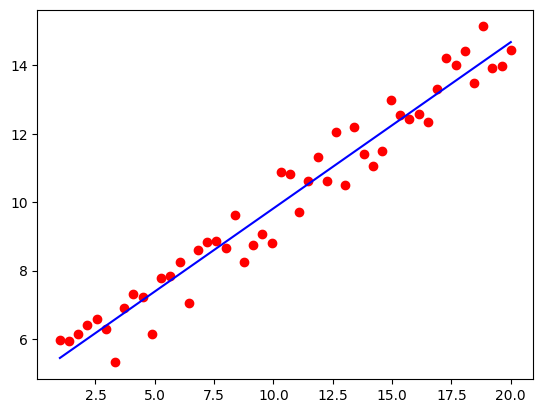

In [2]:
x = [1.00, 1.39, 1.78, 2.16, 2.55, 2.94, 3.33, 3.71, 4.10, 4.49, 4.88, 5.27, 5.65, 6.04, 6.43, 6.82, 7.20, 7.59, 7.98, 8.37, 8.76, 9.14, 9.53, 9.92, 10.31, 10.69, 11.08, 11.47, 11.86, 12.24, 12.63, 13.02, 13.41, 13.80, 14.18, 14.57, 14.96, 15.35, 15.73, 16.12, 16.51, 16.90, 17.29, 17.67, 18.06, 18.45, 18.84, 19.22, 19.61, 20.00]

y = [5.97, 5.95, 6.13, 6.41, 6.57, 6.30, 5.31, 6.90, 7.30, 7.22, 6.15, 7.77, 7.84, 8.24, 7.05, 8.61, 8.83, 8.87, 8.67, 9.63, 8.24, 8.76, 9.06, 8.80, 10.88, 10.83, 9.71, 10.63, 11.33, 10.61, 12.04, 10.51, 12.20, 11.40, 11.07, 11.50, 12.98, 12.56, 12.44, 12.57, 12.36, 13.32, 14.22, 14.01, 14.42, 13.48, 15.14, 13.92, 13.97, 14.44]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T # bikin v stack dl pokoknya trs one len
Y = y[:, np.newaxis] #inget pake newaxs
alpha = np.linalg.inv(np.dot(A.T, A)) # baru inverse
alpha = np.dot(alpha, A.T)
alpha = np.dot(alpha, Y)

print(f"alpha : {alpha}") # buat nunjukin 'm' & 'c' (alpha[0] = m & alpha[1] = c)

plt.plot(x, y, "ro")
plt.plot(x, alpha[0] * x+ alpha[1], "b-")
plt.show()

no 3 - newton Raphson

In [9]:
def f(x): 
    return 8 * (x**5) - 10 * (x**4) + (x ** 3) + 2 * (x**2) + 9*x + 13

def g(x): 
    return 40 * (x**4) - 40 * (x ** 3) + 3 * (x**2) + 4*x + 9 

def newton_raphson(x, tol = 0.031, max_iter = 50):
    found = False
    for i in range(max_iter):
        x = x - (f(x)/g(x))
        print(f"Iteration {i+1} : {x}")
        if np.abs(f(x)) < tol:
            print(f"Found root at {x}")
            print(f"{np.abs(f(x))}")
            found = True
            return
    if found == False:
        print("Error , root not found")

newton_raphson(5)

Iteration 1 : 4.055760047751691
Iteration 2 : 3.2995992993701333
Iteration 3 : 2.691142040353687
Iteration 4 : 2.1941206124780868
Iteration 5 : 1.7693673505975802
Iteration 6 : 1.3536896666513434
Iteration 7 : 0.7335064821901164
Iteration 8 : -1.3942760169601534
Iteration 9 : -1.1029655134470373
Iteration 10 : -0.9073243206569388
Iteration 11 : -0.815342818303601
Iteration 12 : -0.7972383775051456
Found root at -0.7972383775051456
0.026922346068094072
